In [2]:
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_pickle('files/table.pkl')
unmodified=df

In [107]:
cols=df.columns
cols

Index(['year', 'state', 'county', 'GeoFips', 'candidate', 'party',
       'candidatevotes', 'totalvotes', 'num_jobs',
       'total_personal_income_thous', 'Farm_income_thousands', 'Income/Capita',
       'population', 'avg_sal', 'labor_Force', 'Employed', 'Unemployed',
       'Unemployment_Rate', 'share_vote'],
      dtype='object')

In [110]:
useless_columns=[0,2,4]
df=df.drop(labels=[cols[x] for x in useless_columns],axis=1)

In [112]:
df.columns

Index(['state', 'GeoFips', 'party', 'candidatevotes', 'totalvotes', 'num_jobs',
       'total_personal_income_thous', 'Farm_income_thousands', 'Income/Capita',
       'population', 'avg_sal', 'labor_Force', 'Employed', 'Unemployed',
       'Unemployment_Rate', 'share_vote'],
      dtype='object')

In [84]:
#demographic accuracy check on data
#checking for loss

In [113]:
#arbitrary split
dft=df[df['party']=='republican']

In [114]:
dft['population'].sum()
#lost ~6mil

314074680.0

In [144]:
dft['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [146]:
x=['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']
len(x)

50

In [136]:
s=dft.groupby(by=['state']).sum()

In [133]:
s.loc['California']['population']

39296476.0

In [4]:
unmodified.head()

,year,state,county,GeoFips,candidate,party,candidatevotes,totalvotes,num_jobs,total_personal_income_thous,Farm_income_thousands,Income/Capita,population,avg_sal,labor_Force,Employed,Unemployed,Unemployment_Rate,share_vote
0,2016,Alabama,Autauga,1001.0,Hillary Clinton,democrat,5936.0,24973,17445.0,2183987.0,3073.0,39509.0,55278.0,36966.0,25966.0,24645.0,1321.0,5.1,0.237697
1,2016,Alabama,Autauga,1001.0,Donald Trump,republican,18172.0,24973,17445.0,2183987.0,3073.0,39509.0,55278.0,36966.0,25966.0,24645.0,1321.0,5.1,0.727666
2,2016,Alabama,Baldwin,1003.0,Hillary Clinton,democrat,18458.0,95215,107855.0,8923673.0,15316.0,43004.0,207509.0,36078.0,90670.0,85839.0,4831.0,5.3,0.193856
3,2016,Alabama,Baldwin,1003.0,Donald Trump,republican,72883.0,95215,107855.0,8923673.0,15316.0,43004.0,207509.0,36078.0,90670.0,85839.0,4831.0,5.3,0.765457
4,2016,Alabama,Barbour,1005.0,Hillary Clinton,democrat,4871.0,10469,11633.0,818333.0,28166.0,31750.0,25774.0,38418.0,8417.0,7717.0,700.0,8.3,0.465278


In [7]:
unmodified['Unemployment_Rate'].describe()

count    6092.000000
mean        5.206533
std         1.822234
min         1.700000
25%         4.000000
50%         4.900000
75%         6.100000
max        24.100000
Name: Unemployment_Rate, dtype: float64

KeyError: 'state'

In [126]:
39296476-39210000

86476

In [139]:
s.loc['Nevada']

GeoFips                        5.447740e+05
candidatevotes                 5.120580e+05
totalvotes                     1.125385e+06
num_jobs                       1.724769e+06
total_personal_income_thous    1.307568e+08
Farm_income_thousands          8.862600e+04
Income/Capita                  7.207800e+05
population                     2.939254e+06
avg_sal                        9.339080e+05
labor_Force                    1.424145e+06
Employed                       1.342473e+06
Unemployed                     8.167200e+04
Unemployment_Rate              9.630000e+01
share_vote                     1.133756e+01
Name: Nevada, dtype: float64

In [116]:
dft.head()

,state,GeoFips,party,candidatevotes,totalvotes,num_jobs,total_personal_income_thous,Farm_income_thousands,Income/Capita,population,avg_sal,labor_Force,Employed,Unemployed,Unemployment_Rate,share_vote
1,Alabama,1001.0,republican,18172.0,24973,17445.0,2183987.0,3073.0,39509.0,55278.0,36966.0,25966.0,24645.0,1321.0,5.1,0.727666
3,Alabama,1003.0,republican,72883.0,95215,107855.0,8923673.0,15316.0,43004.0,207509.0,36078.0,90670.0,85839.0,4831.0,5.3,0.765457
5,Alabama,1005.0,republican,5454.0,10469,11633.0,818333.0,28166.0,31750.0,25774.0,38418.0,8417.0,7717.0,700.0,8.3,0.520967
7,Alabama,1007.0,republican,6738.0,8819,6459.0,656112.0,2022.0,28989.0,22633.0,39766.0,8623.0,8067.0,556.0,6.4,0.764032
9,Alabama,1009.0,republican,22859.0,25588,15218.0,1857001.0,12620.0,32261.0,57562.0,32868.0,24623.0,23298.0,1325.0,5.4,0.893348


In [ ]:
#proceceed assuming loss is acceptable

In [ ]:

df['share_vote']=df['candidatevotes']/df['totalvotes']

In [ ]:
#split by candidate

In [8]:
df16T=df[df['party']=='republican']

In [9]:
df16H=df[df['party']=='democrat']

In [ ]:
#district view for 

In [22]:
#print view
for x in df.columns[11:21]:
    t=stats.pearsonr(df16T['share_vote'], df16T[x])
    h=stats.pearsonr(df16H['share_vote'], df16H[x])
    print(f'the pearson corr and p-val for Tvotes and {x} is {t}')
    print(f'the pearson corr and p-val for Hvotes and {x} is {h}')

the pearson corr and p-val for Tvotes and num_jobs is (-0.3599006777460907, 8.118636456247571e-94)
the pearson corr and p-val for Hvotes and num_jobs is (0.36202002465508465, 5.5476797679820525e-95)
the pearson corr and p-val for Tvotes and total_personal_income_thous is (-0.3518124941952667, 1.8884744285641608e-89)
the pearson corr and p-val for Hvotes and total_personal_income_thous is (0.3554078451517264, 2.2428512883472852e-91)
the pearson corr and p-val for Tvotes and Farm_income_thousands is (-0.12230519539132617, 1.2634518818960389e-11)
the pearson corr and p-val for Hvotes and Farm_income_thousands is (0.10734050452384607, 2.869087221004658e-09)
the pearson corr and p-val for Tvotes and Income/Capita is (-0.24579393377015013, 3.77022887341649e-43)
the pearson corr and p-val for Hvotes and Income/Capita is (0.20855926892030208, 2.770114340326044e-31)
the pearson corr and p-val for Tvotes and population is (-0.35456773111055284, 6.352252272908418e-91)
the pearson corr and p-val f

In [28]:
#creating dataframes for each candidate
trum=[]
hill=[]
for x in df.columns[11:21]:
    t=stats.pearsonr(df16T['share_vote'], df16T[x])
    trum.append([t[0],t[1],x])
    h=stats.pearsonr(df16H['share_vote'], df16H[x])
    hill.append([h[0],h[1],x])

In [35]:
dft=pd.DataFrame(trum)
dft=dft.rename(columns={0:'corr',1:'p',2:'var'})
dft.set_index('var',inplace=True)

In [42]:
dfh=pd.DataFrame(hill)
dfh=dfh.rename(columns={0:'corr',1:'p',2:'var'})
dfh.set_index('var',inplace=True)

In [45]:
dft.head()

,corr,p
var,,
num_jobs,-0.359901,8.118636e-94
total_personal_income_thous,-0.351812,1.888474e-89
Farm_income_thousands,-0.122305,1.263452e-11
Income/Capita,-0.245794,3.770229e-43
population,-0.354568,6.352252e-91


In [8]:
#some degree of certainty for p-value
dft.sort_values(by='corr')

NameError: name 'dft' is not defined

In [48]:
dfh.sort_values(by='corr')

,corr,p
var,,
num_jobs,0.362020,5.547680e-95
Employed,0.361413,1.199712e-94
labor_Force,0.361131,1.714384e-94
population,0.357344,2.010930e-92
total_personal_income_thous,0.355408,2.242851e-91
avg_sal,0.350103,1.524162e-88
Unemployed,0.349195,4.590544e-88
Income/Capita,0.208559,2.770114e-31
Unemployment_Rate,0.175918,1.353369e-22


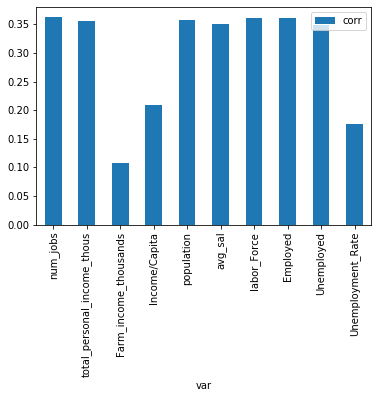

In [60]:
#basic plots of correls
dfh.plot(kind='bar', use_index=True, y='corr')

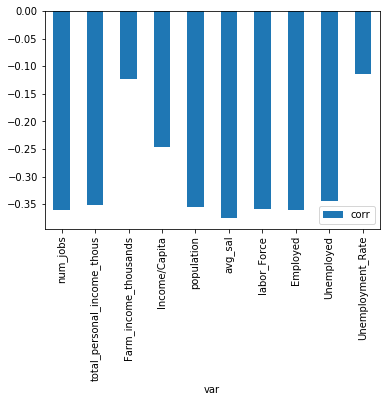

In [61]:
dft.plot(kind='bar',use_index=True,y='corr')

In [54]:
plt.show()

In [70]:
pickle['Unemployment_Rate'].describe()

count    6092.000000
mean        5.206533
std         1.822234
min         1.700000
25%         4.000000
50%         4.900000
75%         6.100000
max        24.100000
Name: Unemployment_Rate, dtype: float64

In [81]:
xx=pickle[['share_vote','party','Unemployment_Rate']][pickle['Unemployment_Rate']>10][pickle['party']=='democrat']

/home/poxlox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [83]:
stats.pearsonr(xx['share_vote'],xx['Unemployment_Rate'])

(0.1309314285913386, 0.3272524555795099)